<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

29

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'), Index(['Inches', 'Price'], dtype='object'))

In [11]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [12]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


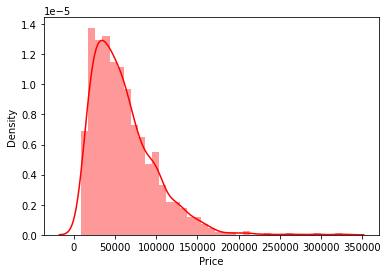

In [14]:
# viewing the distribution of the price column

sn.distplot(df['Price'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

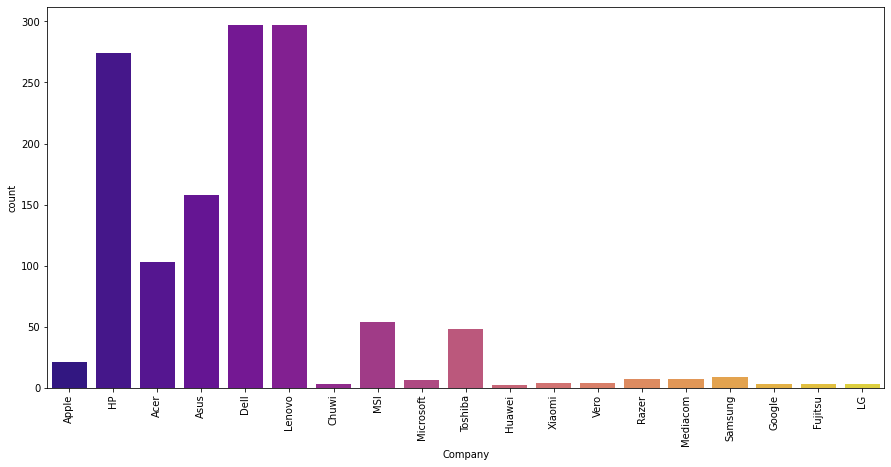

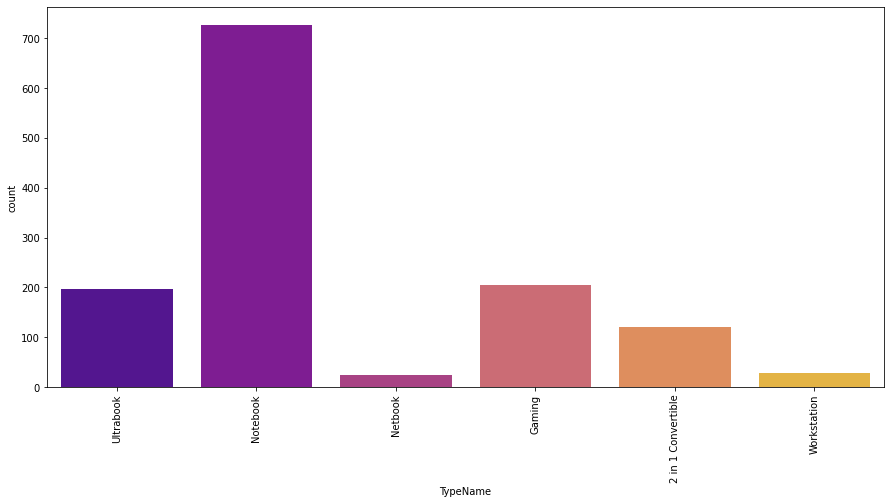

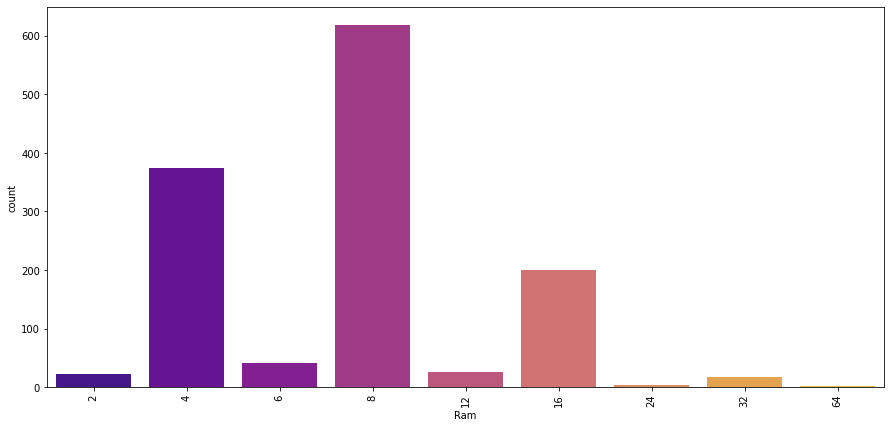

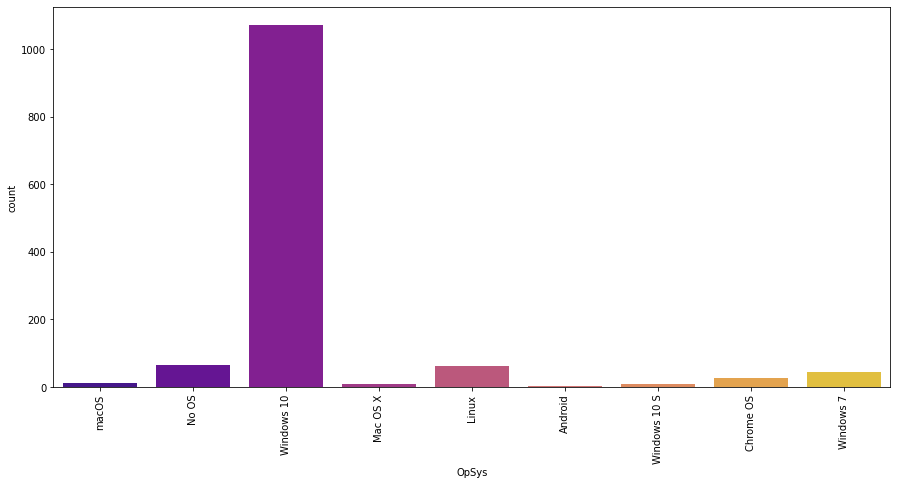

In [15]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

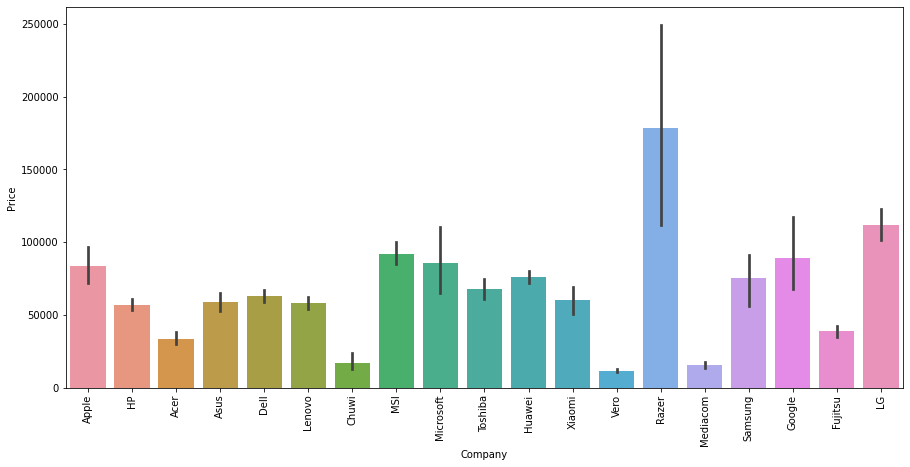

In [16]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

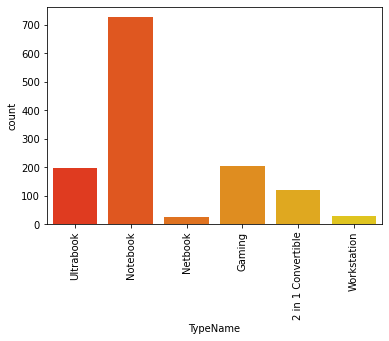

In [17]:
## various types of laptops

sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

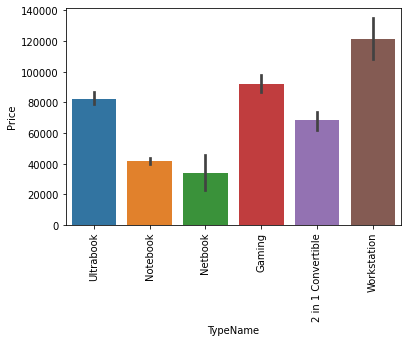

In [18]:
# laptop type and variation about the price 

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')

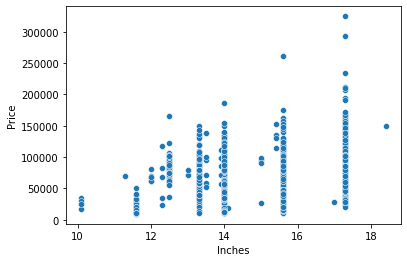

In [19]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [22]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
622,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,1TB HDD,AMD Radeon 530,Windows 10,2.2,41345.2800,0
175,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.3,24455.5200,0
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.3,44701.9200,1
289,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.2,35112.0528,0
443,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,2.2,18594.7200,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


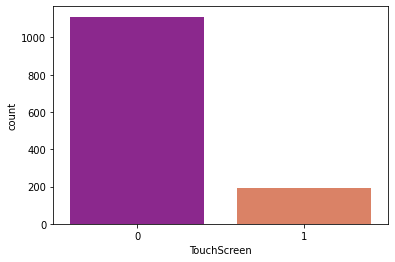

In [23]:
sn.countplot(df['TouchScreen'],palette='plasma')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

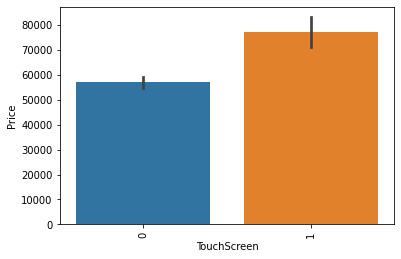

In [24]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [25]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.60,0,0
602,Acer,Notebook,14.0,Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.60,17529.12,0,0
1160,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.70,79866.72,0,0
337,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,60952.32,0,0
216,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.92,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


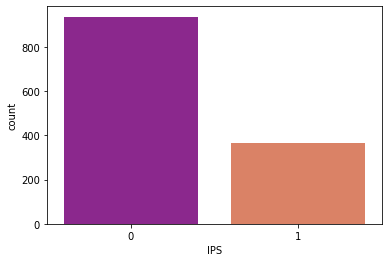

In [26]:
sn.countplot(df['IPS'],palette='plasma')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

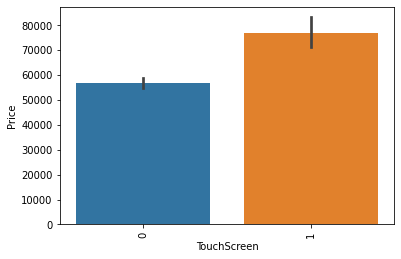

In [27]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [28]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [29]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [30]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it,but the problem is the numbers are scattered 
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.? 
all the numbers which come after an number and \d+ the string must end with number


'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


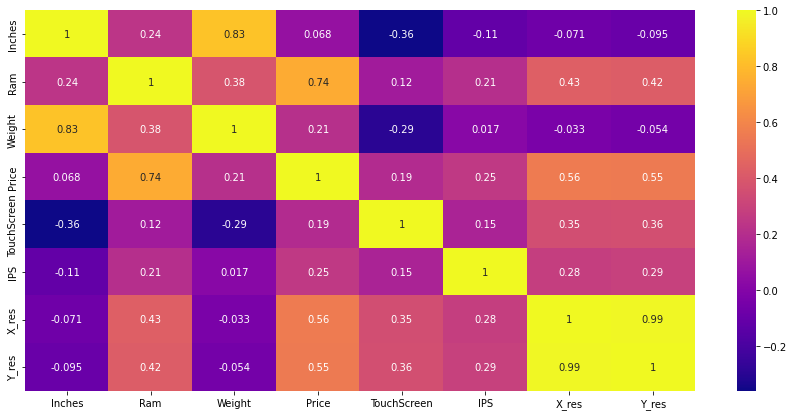

In [32]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [33]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [36]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [37]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [38]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [39]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [40]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [41]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

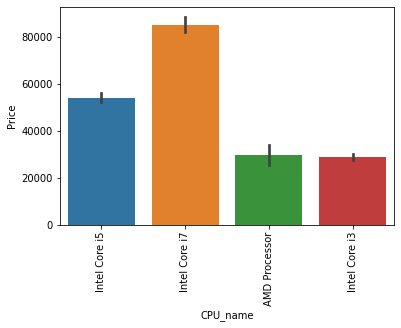

In [43]:
# price vs processor variation

sn.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation = 'vertical')

In [44]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


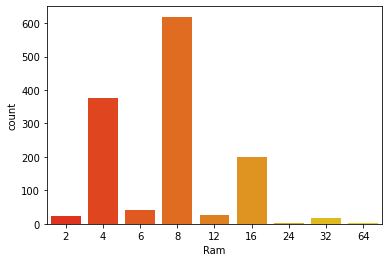

In [45]:
sn.countplot(df['Ram'],palette='autumn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


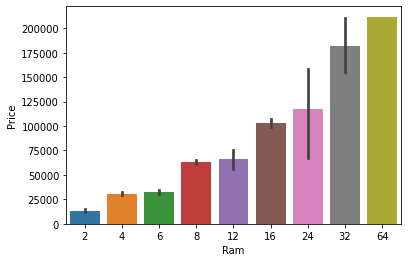

In [46]:
## ram is having good relation with price

sn.barplot(df['Ram'],df['Price'])

In [47]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [48]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [50]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [51]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [52]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [53]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [54]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [55]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [56]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [57]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
388,Dell,Workstation,8,256 SSD,Nvidia Quadro M1200,Windows 10,2.00,113752.800,0,1,141.211998,Intel Core i7,0,256,0,0
1206,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,30849.120,0,0,100.454670,Intel Core i5,0,256,0,0
290,Acer,Notebook,2,16 SSD,Intel HD Graphics,Chrome OS,2.19,10602.720,0,0,100.454670,AMD Processor,0,16,0,0
900,Dell,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 615,Windows 10,1.24,107257.968,1,0,276.053530,Intel Core i7,0,512,0,0
1147,Dell,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.18,53807.472,0,0,141.211998,Intel Core i7,0,256,0,0


In [58]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
821,Toshiba,Ultrabook,4,Intel HD Graphics 620,Windows 10,1.25,58075.2000,0,0,111.935204,Intel Core i5,0,128,0,0
881,HP,2 in 1 Convertible,4,Intel HD Graphics 620,Windows 10,2.30,36486.1440,1,0,100.454670,Intel Core i5,500,0,0,0
401,Asus,Gaming,16,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.1200,0,0,127.335675,Intel Core i7,1000,256,0,0
534,Asus,Gaming,8,Nvidia GeForce GTX 1060,Windows 10,2.30,87858.7200,0,1,141.211998,Intel Core i5,1000,128,0,0
536,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.20,42486.0048,0,0,141.211998,Intel Core i5,0,256,0,0


In [59]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [60]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [61]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [62]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


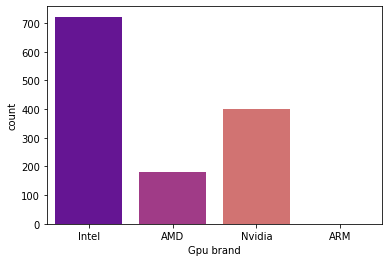

In [63]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


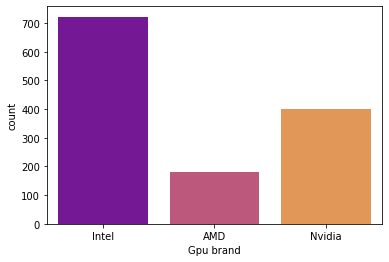

In [64]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


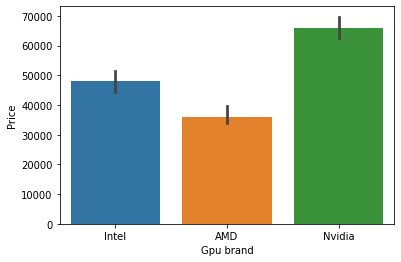

In [65]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sn.barplot(df['Gpu brand'],df['Price'],estimator=np.median)

In [66]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


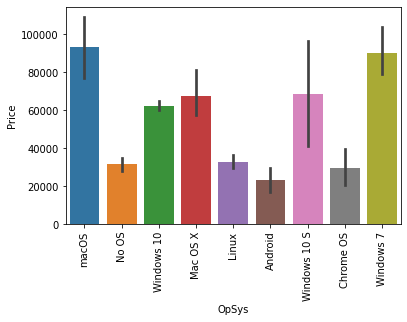

In [68]:
sn.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [69]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [70]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [71]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
512,Dell,Notebook,8,Windows,2.18,44542.08,0,0,141.211998,Intel Core i5,1000,0,Intel
752,Asus,Notebook,4,Other,2.45,30849.12,0,0,100.454670,Intel Core i5,1000,0,Nvidia
760,Lenovo,Gaming,8,Windows,2.50,55837.44,0,1,141.211998,Intel Core i7,1000,128,Nvidia
545,HP,Notebook,4,Windows,2.10,37589.04,0,0,141.211998,Intel Core i3,0,128,Intel
959,Acer,2 in 1 Convertible,4,Other,1.25,20725.92,1,1,135.094211,AMD Processor,0,0,Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


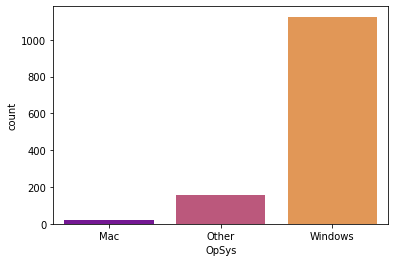

In [72]:
sn.countplot(df['OpSys'],palette='plasma')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

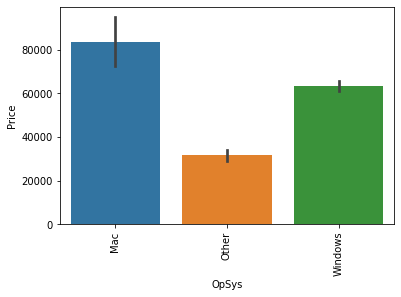

In [73]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


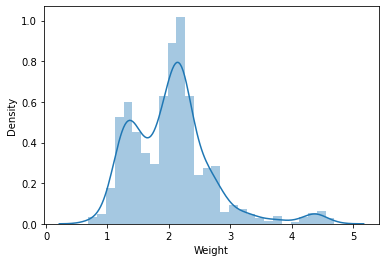

In [74]:
sn.distplot(df['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


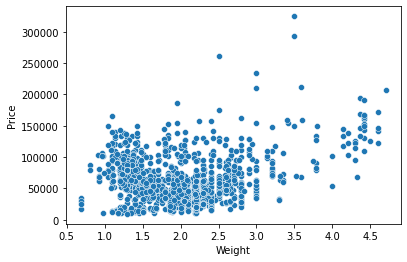

In [75]:
sn.scatterplot(df['Weight'],df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


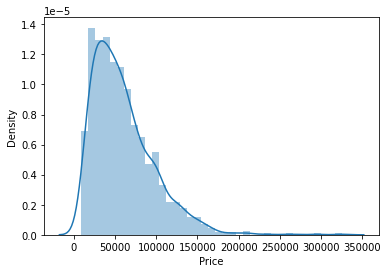

In [76]:
sn.distplot(df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


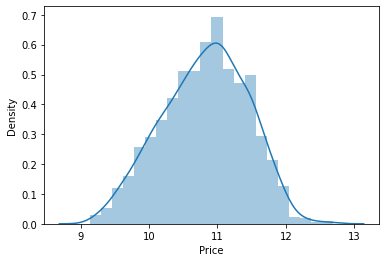

In [77]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))

In [78]:
## correlation with price

df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

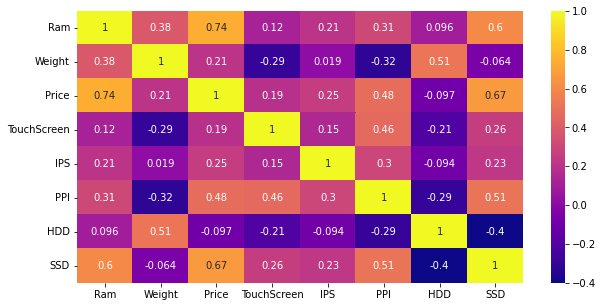

In [79]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [80]:
## Model Building

In [81]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [84]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

In [85]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8111413817254319
MAE 0.20734892652421028


In [86]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

1.2336780599567432

In [87]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8180546436698717
MAE 0.20561902548147712


In [88]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8127482499107282
MAE 0.20864798026991482


In [89]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8491093772892462
MAE 0.1786760176951463


In [90]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8505175073799536
MAE 0.17757024845105396


In [91]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [92]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [93]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [94]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()




,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 37), (196, 37))

[Text(0.4839650125042473, 0.98, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.2031795449121416, 0.94, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.11822239964241797, 0.9, 'Ram <= 3.0\nsquared_error = 0.131\nsamples = 260\nvalue = 10.049'),
 Text(0.050417448708821436, 0.86, 'Weight <= 2.195\nsquared_error = 0.045\nsamples = 17\nvalue = 9.465'),
 Text(0.049381917028024074, 0.82, 'Weight <= 1.16\nsquared_error = 0.021\nsamples = 15\nvalue = 9.406'),
 Text(0.04679308782603068, 0.78, 'TypeName_Netbook <= 0.5\nsquared_error = 0.008\nsamples = 3\nvalue = 9.588'),
 Text(0.045757556145233316, 0.74, 'Weight <= 1.125\nsquared_error = 0.003\nsamples = 2\nvalue = 9.643'),
 Text(0.04472202446443596, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 9.592'),
 Text(0.04679308782603068, 0.7, 'squared_error = -0.0\nsamples = 1\nvalue = 9.694'),
 Text(0.047828619506828034, 0.74, 'squared_error = 0.0\nsamples = 1\nvalue = 9.47

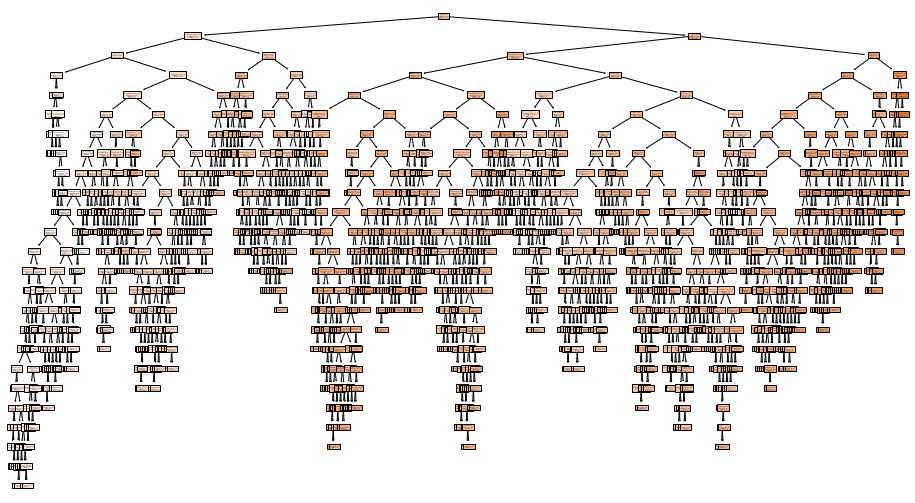

In [96]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [97]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [98]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

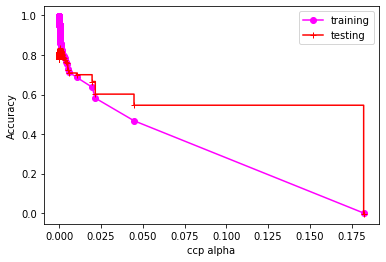

In [99]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(0.125, 0.5, 'squared_error = 0.131\nsamples = 260\nvalue = 10.049'),
 Text(0.375, 0.5, 'squared_error = 0.114\nsamples = 102\nvalue = 10.619'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 11.558')]

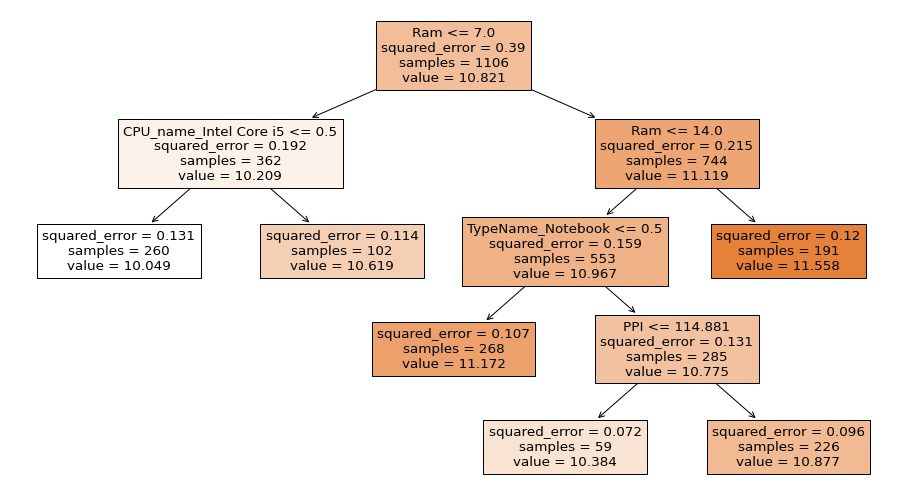

In [100]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [101]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [102]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=955; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=955; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=955; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=955; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_estimators=955; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=955; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=955; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=955; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=955; total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=955; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  42.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  38.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  40.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=711; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=711; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=711; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=711; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=711; total time=   4.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=833; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=833; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=833; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=833; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=14, min_samples_split=14, n_estimators=833; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  24.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  24.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1077; total time=  23.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=344; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=344; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=344; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=344; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=344; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=14, n_estimators=588; total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.1s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.1s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=l

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [103]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.066470,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.091381,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [104]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.06647010576122744,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=15,
                        min_samples_leaf=2, n_estimators=1200)},
 {'model_name': 'Decision Tree',
  'best_score': -0.09138114448643844,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mae', max_depth=22,
                        max_features='auto', min_samples_leaf=5,
                        min_samples_split=14)}]

In [105]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8505175073799536


In [106]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

[array([11.24310612]),
 array([11.17257737]),
 array([10.79802148]),
 array([11.56658118]),
 array([11.25903673]),
 array([10.00105118]),
 array([11.56048077]),
 array([11.17257737]),
 array([11.51480536]),
 array([11.01726854]),
 array([10.54493271]),
 array([10.16640587]),
 array([11.56422694]),
 array([10.2622545]),
 array([11.25917298]),
 array([11.25903673]),
 array([10.91198553]),
 array([11.56658118]),
 array([10.69461487]),
 array([11.21159256]),
 array([9.75461985]),
 array([10.98350056]),
 array([9.94296426]),
 array([11.01726854]),
 array([11.08145098]),
 array([10.17987408]),
 array([11.17257737]),
 array([10.88950339]),
 array([11.07282786]),
 array([10.79786773]),
 array([9.88864141]),
 array([9.90960486]),
 array([10.04152097]),
 array([11.56591172]),
 array([11.17257737]),
 array([9.78309748]),
 array([10.15449154]),
 array([10.93689673]),
 array([10.54169456]),
 array([10.89283689]),
 array([10.17635504]),
 array([11.42880095]),
 array([10.38966614]),
 array([10.514539

In [107]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [108]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76351.741254
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,71152.260298
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48923.908529
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,105512.127499
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,77577.811631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,28396.450438
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,105441.514908
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0,Intel,18152.429582
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,25698.980041


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


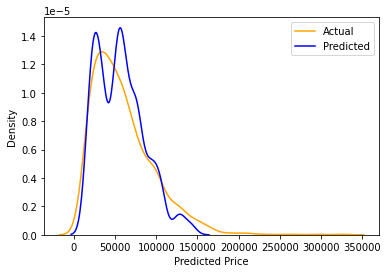

In [109]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [110]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8893894045807214


In [111]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

[array([11.1881239]),
 array([10.85788875]),
 array([10.59603995]),
 array([11.82349278]),
 array([11.31117007]),
 array([9.862194]),
 array([11.47397568]),
 array([10.85788875]),
 array([11.43979491]),
 array([10.80815887]),
 array([10.23844578]),
 array([9.95967176]),
 array([11.75633268]),
 array([10.27970213]),
 array([11.19896791]),
 array([11.31117007]),
 array([10.75499729]),
 array([11.82349278]),
 array([10.30075935]),
 array([11.02520582]),
 array([9.49363702]),
 array([10.86681087]),
 array([9.64234411]),
 array([10.8120035]),
 array([10.83984965]),
 array([10.08496117]),
 array([10.89004615]),
 array([10.68196342]),
 array([11.1505707]),
 array([10.7638468]),
 array([9.68256246]),
 array([9.46824054]),
 array([10.09859252]),
 array([11.63915652]),
 array([10.89004615]),
 array([9.63034559]),
 array([9.92972798]),
 array([10.90174738]),
 array([10.32229713]),
 array([10.78392275]),
 array([10.00531368]),
 array([11.27895653]),
 array([10.36968659]),
 array([10.55347303]),
 a

In [112]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [113]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,72267.074519
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,51942.299354
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,39976.215844
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,136419.883104
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,81729.481538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,35227.655739
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,86349.813421
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,AMD Processor,0,0,Intel,12875.297771
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,37902.246177


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


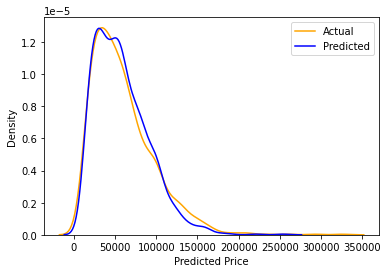

In [114]:
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [115]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [116]:
X_train.iloc[0]

Ram                         8.00000
Weight                      2.00000
TouchScreen                 0.00000
IPS                         0.00000
PPI                       100.45467
HDD                         0.00000
SSD                       128.00000
Company_Apple               0.00000
Company_Asus                0.00000
Company_Chuwi               0.00000
Company_Dell                0.00000
Company_Fujitsu             0.00000
Company_Google              0.00000
Company_HP                  0.00000
Company_Huawei              0.00000
Company_LG                  0.00000
Company_Lenovo              0.00000
Company_MSI                 0.00000
Company_Mediacom            0.00000
Company_Microsoft           0.00000
Company_Razer               0.00000
Company_Samsung             0.00000
Company_Toshiba             1.00000
Company_Vero                0.00000
Company_Xiaomi              0.00000
TypeName_Gaming             0.00000
TypeName_Netbook            0.00000
TypeName_Notebook           